# After the experiments are conducted and the results saved I want to analyse them here in a different notebook

In [11]:
from pathlib import Path

import numpy as np
import pandas as pd
import xgboost as xgb
import sklearn as skl

import operator
import time

from mylib import class_distributions
from mylib import data_selection
from mylib import helper_funcs

from mylib.my_xgb import BinaryDecisionTree as BDT
from mylib.my_xgb import add_class

import dtreeviz
import logging
# to suppress messages when plotting trees
logging.getLogger('matplotlib.font_manager').setLevel(level=logging.CRITICAL)
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# open file

data_folder = Path("../../../data/ForestCoverDataset/")
file_to_open = data_folder / "covtype.data"

In [4]:
# read and prepare data

data = pd.read_csv(file_to_open, delimiter=",", header=None)

# add the header manually
header = {0: "Elevation", 1: "Aspect", 2: "Slope", 3: "Horizontal_Distance_To_Hydrology",
          4: "Vertical_Distance_To_Hydrology", 5: "Horizontal_Distance_To_Roadways",
          6: "Hillshade_9am", 7: "Hillshade_Noon", 8: "Hillshade_3pm", 9: "Horizontal_Distance_To_Fire_Points"}

# add the names of binary columns
for i in range(1, 5):
    header[9+i] = f"Wilderness_Area_{i}"

for i in range(1, 41):
    header[13+i] = f"Soil_Type_{i}"

header[54] = "Class"

#data = data.drop(range(10,54), axis=1)

data = data.rename(header, axis=1)
data["Class"] = data["Class"] - 1   # want 0-based index

In [14]:
label_proportions = class_distributions.label_proportions(data["Class"])
print(label_proportions)

largest_class_label = max(label_proportions.items(), key=operator.itemgetter(1))[0]
smallest_class_label = min(label_proportions.items(), key=operator.itemgetter(1))[0]

1    0.487599
0    0.364605
2    0.061537
6    0.035300
5    0.029891
4    0.016339
3    0.004728
Name: Class, dtype: float64


Training method: continued_training
largest class


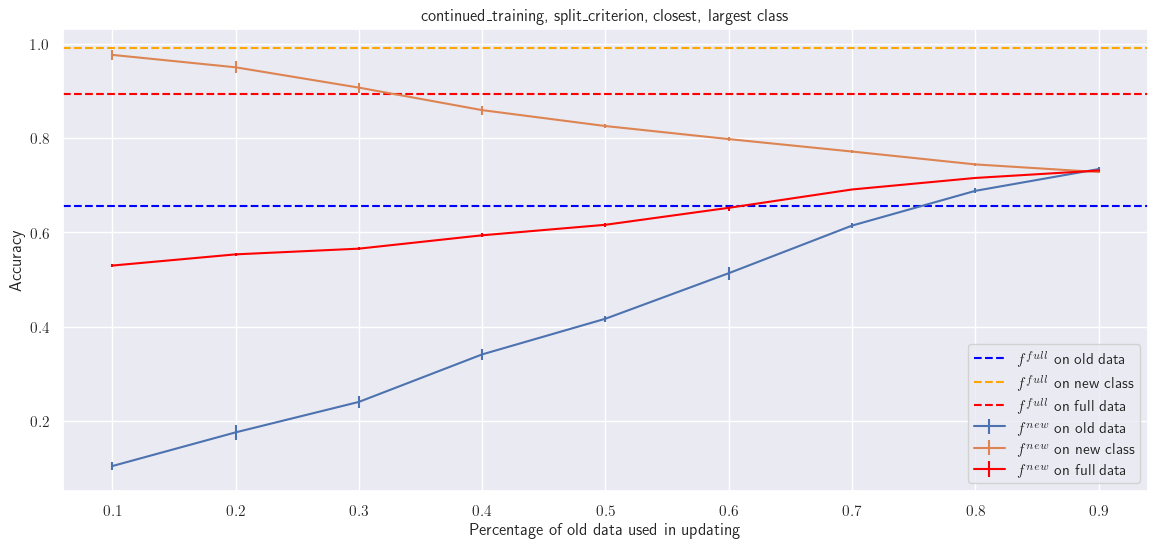

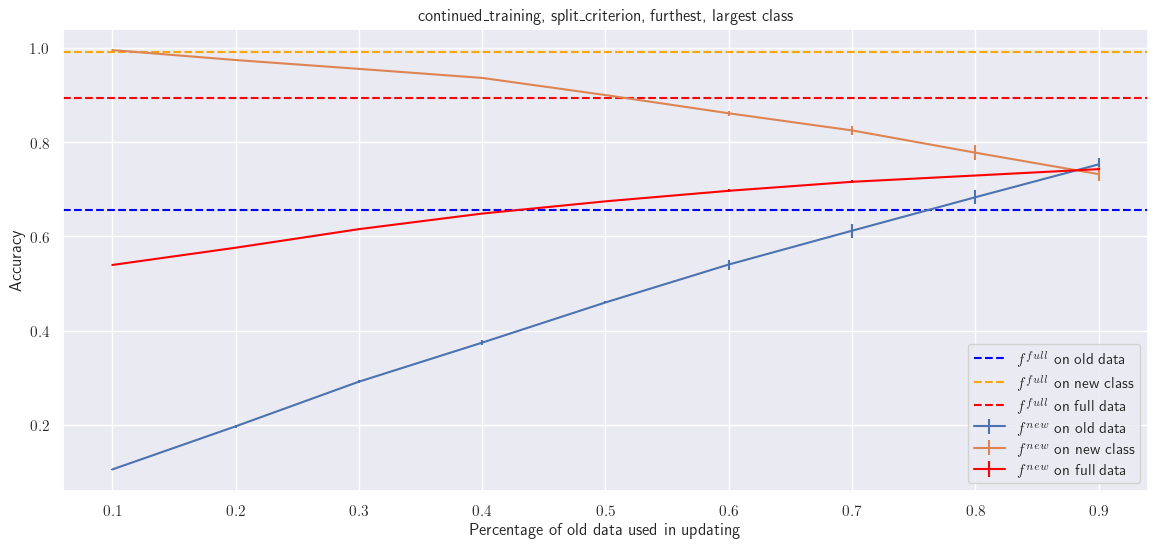

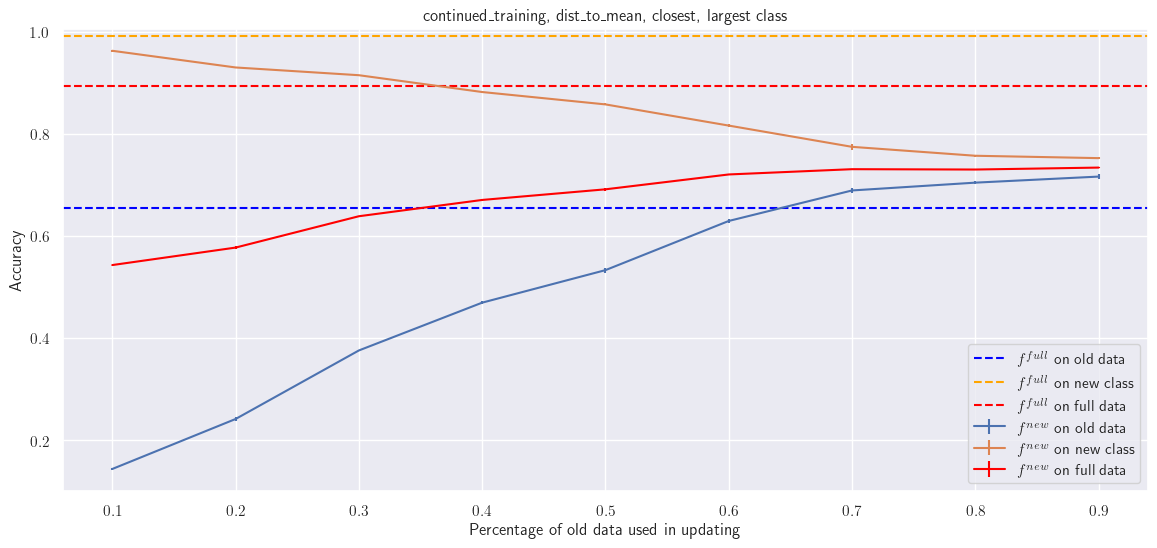

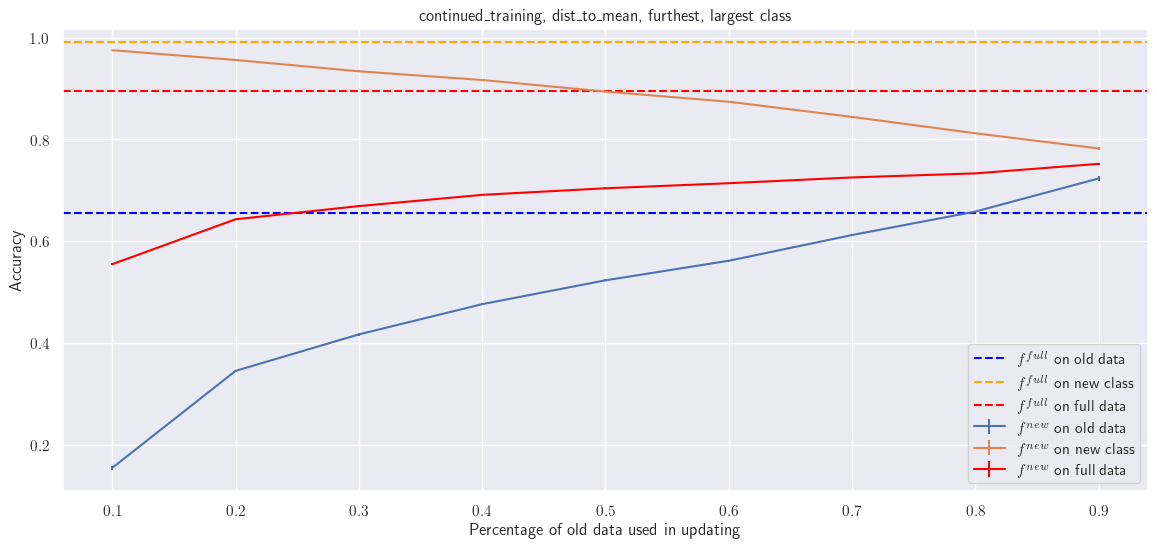

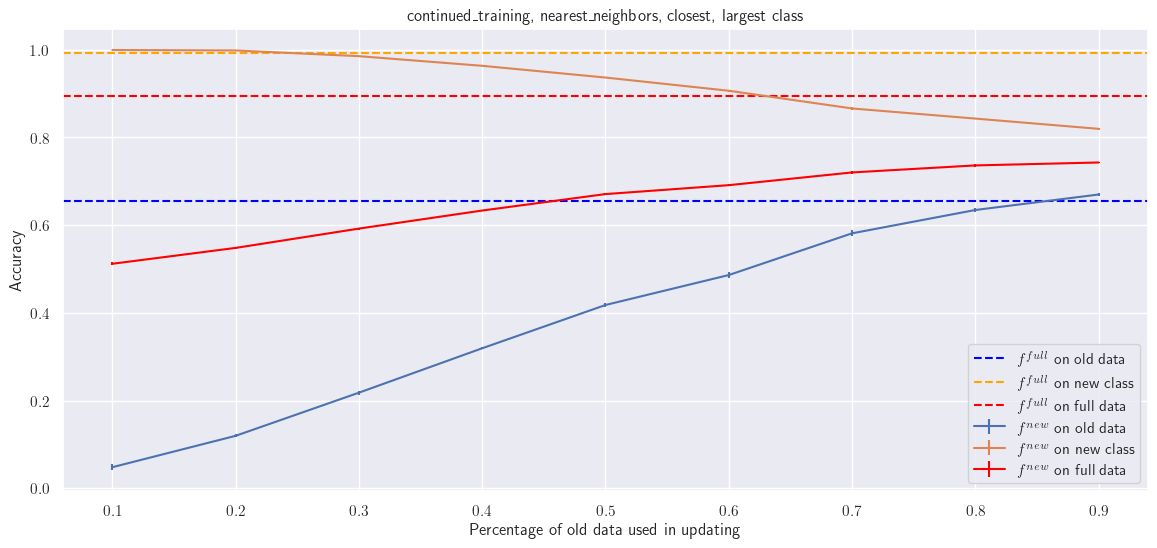

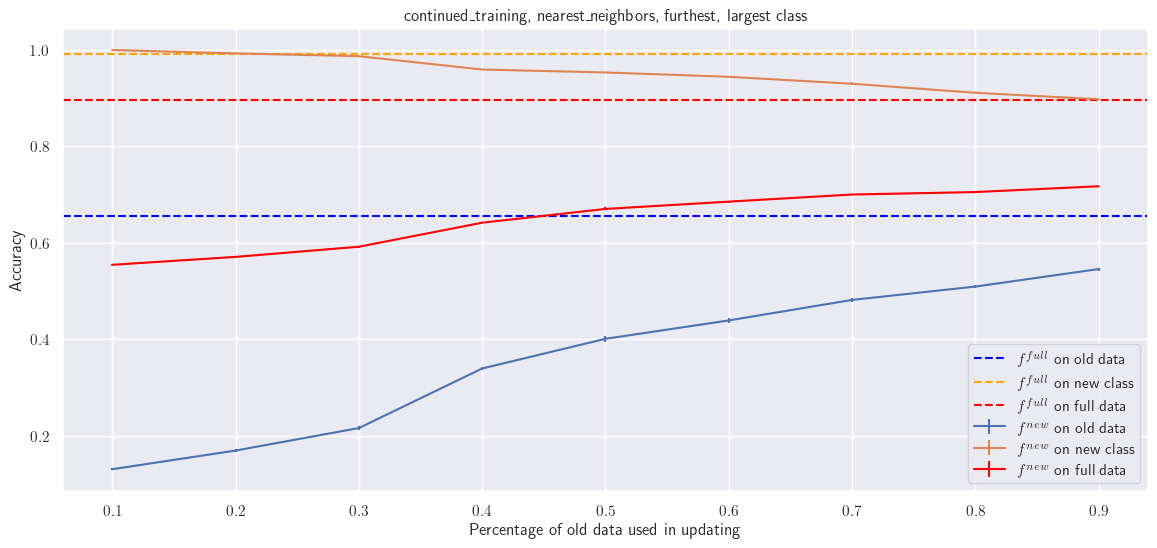

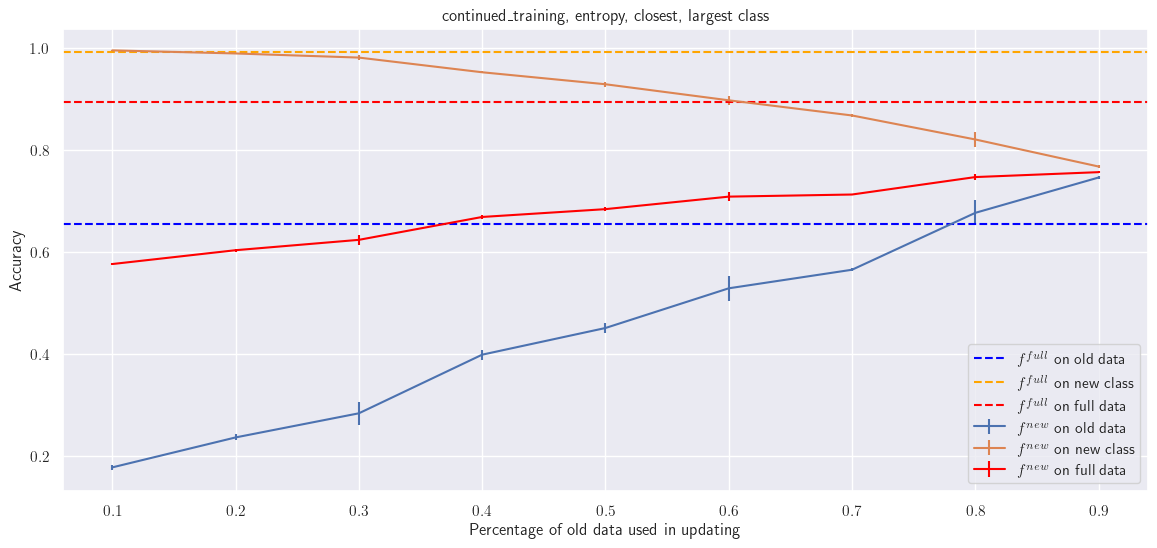

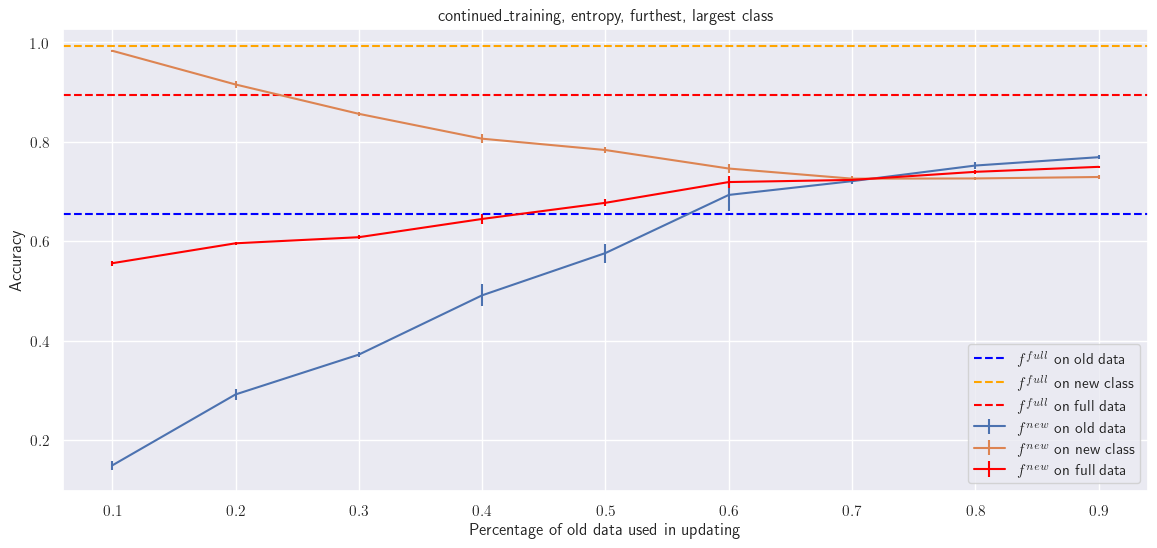

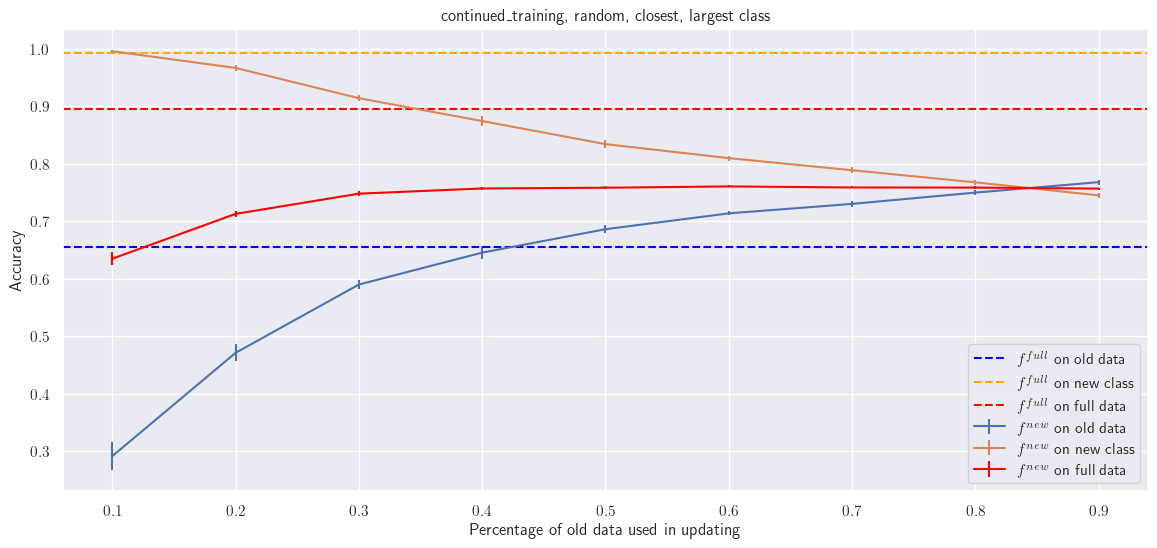

smallest class


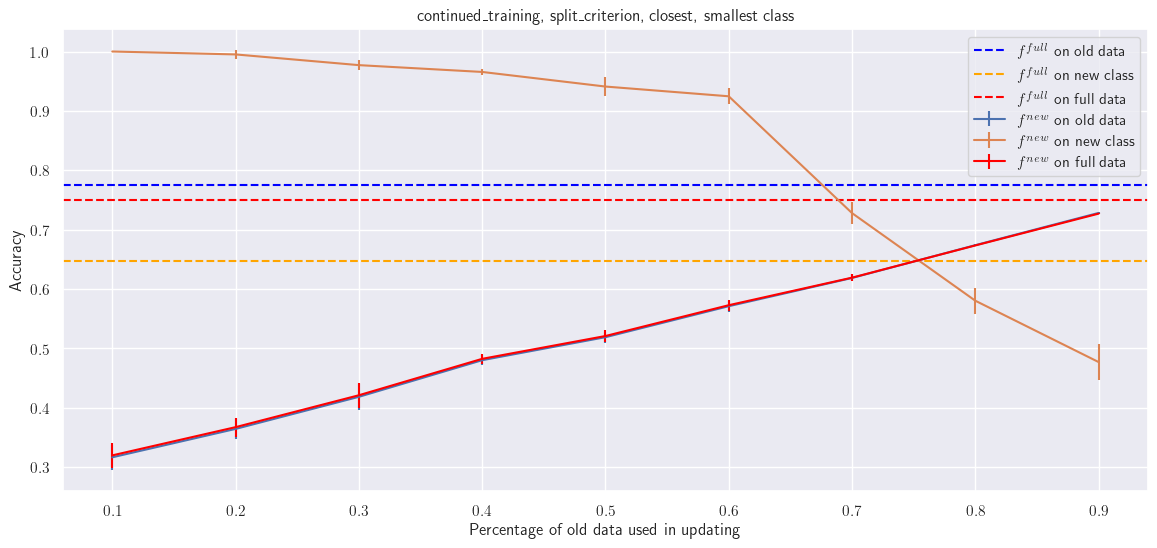

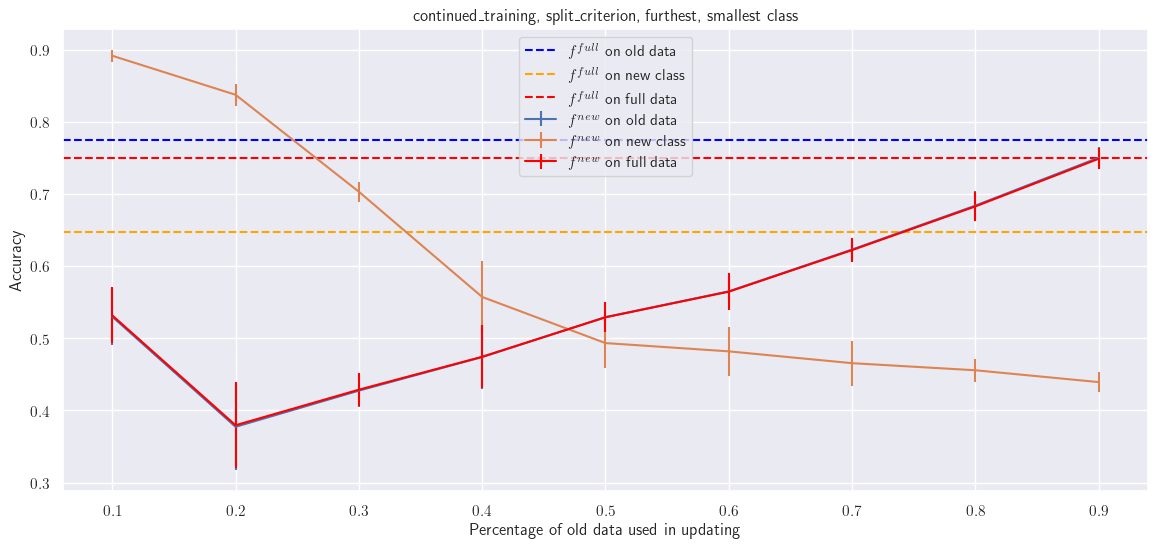

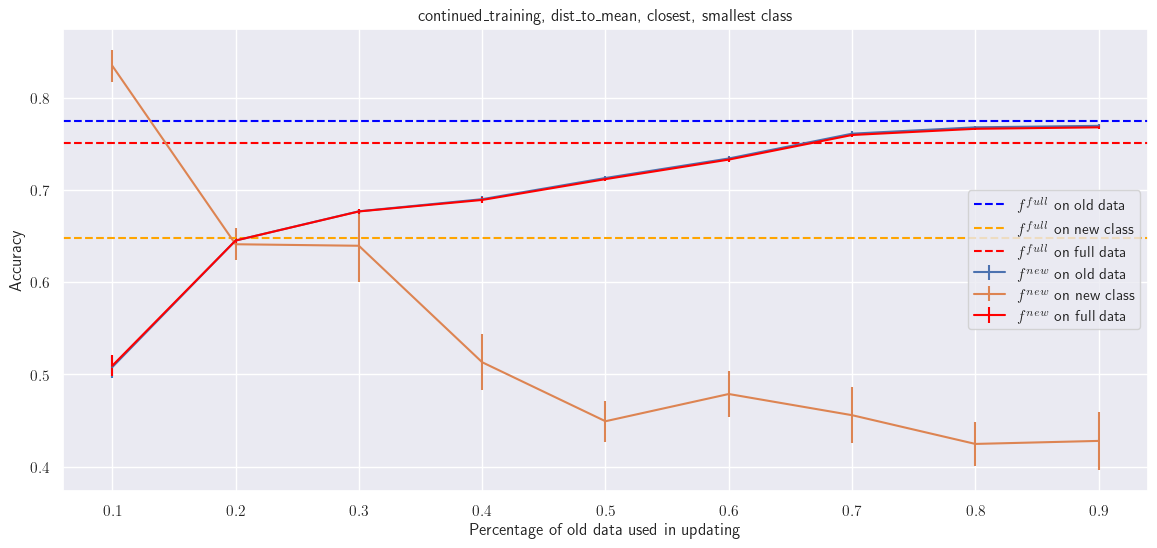

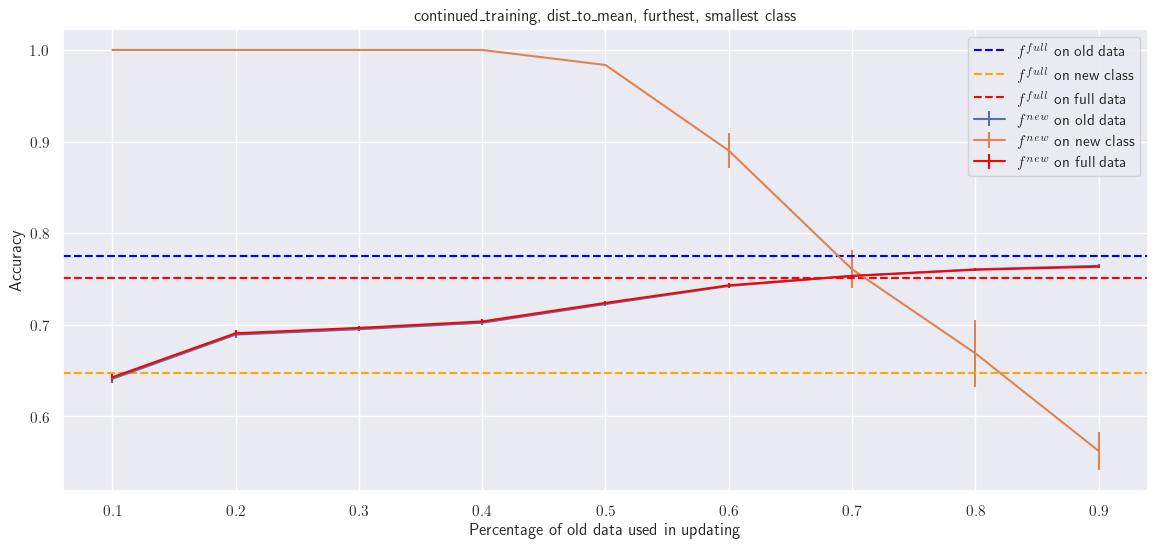

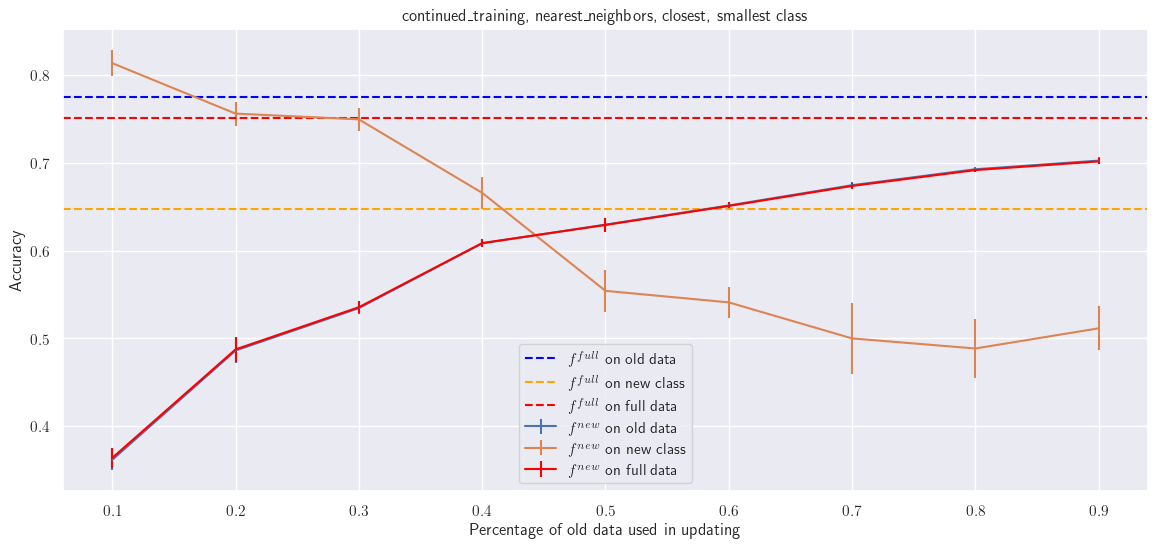

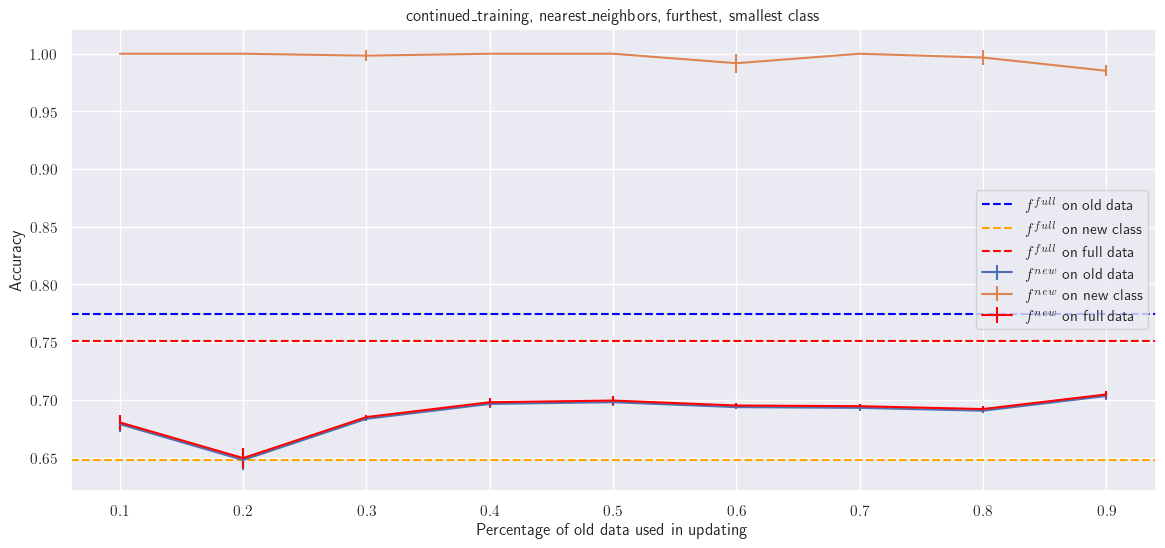

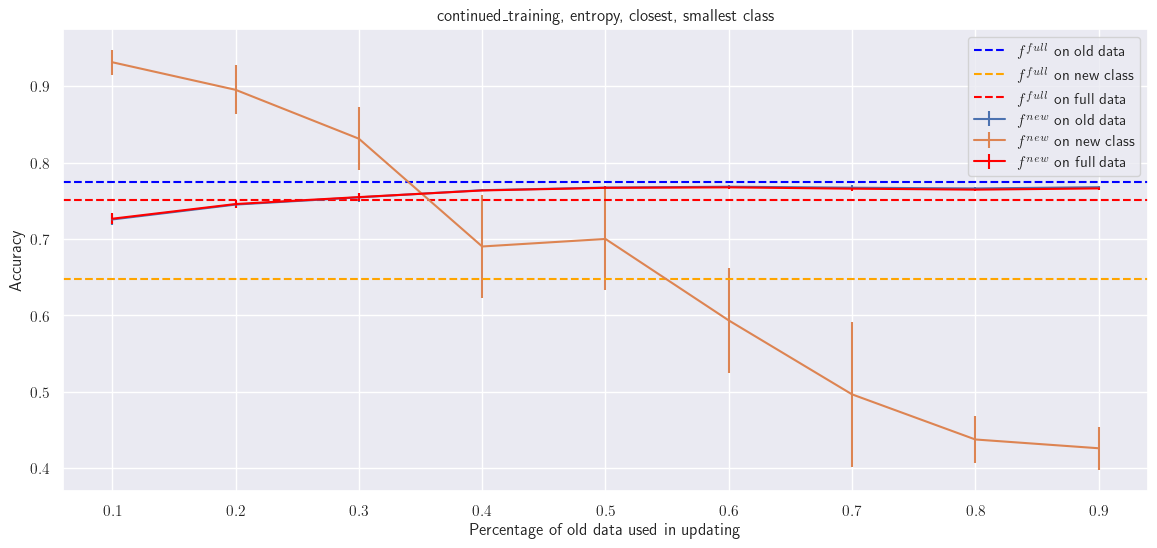

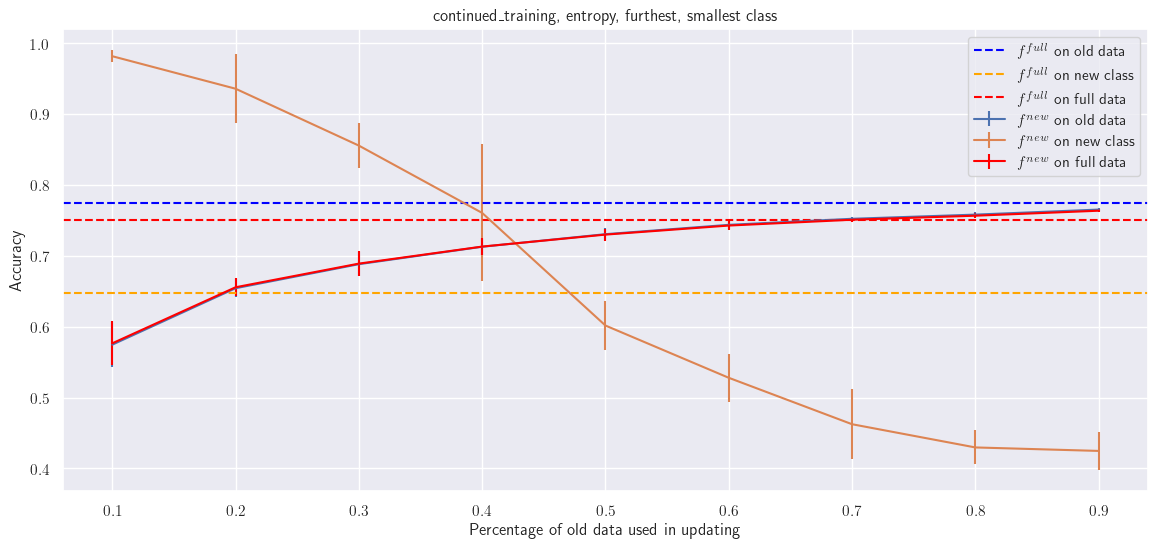

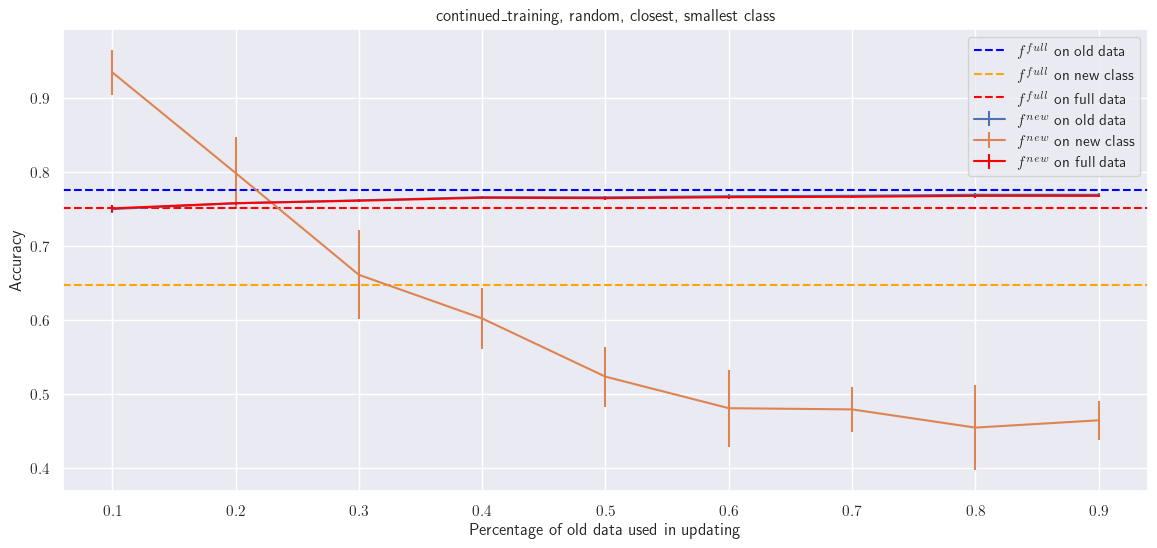

Training method: add_trees
largest class


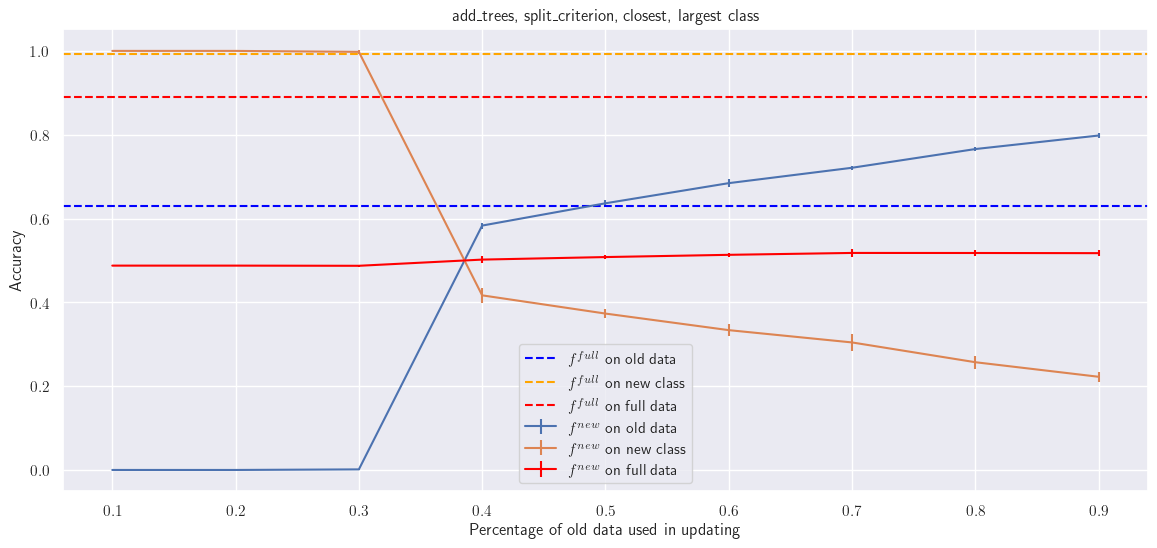

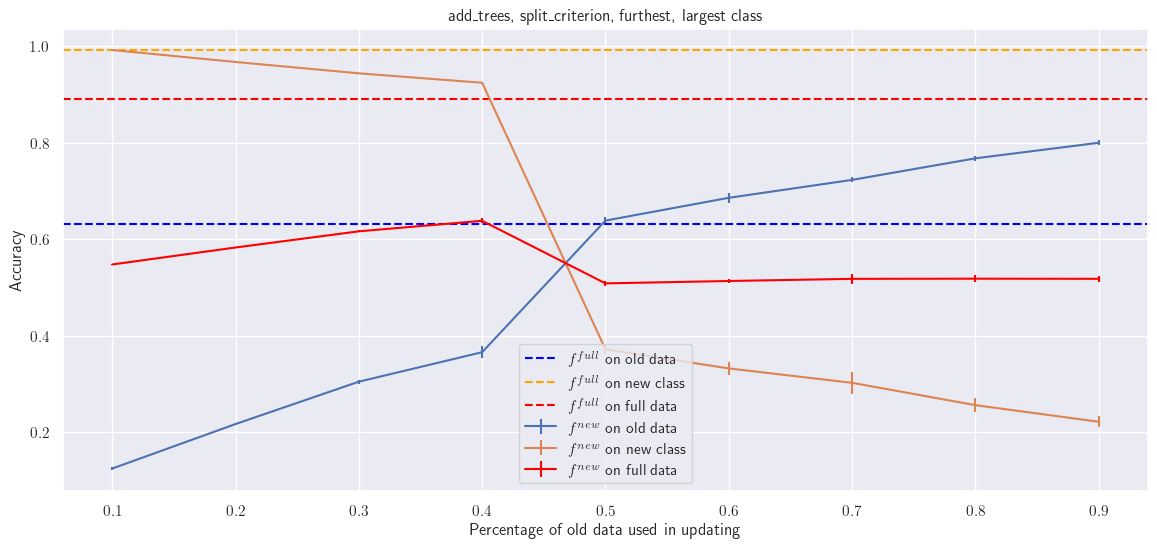

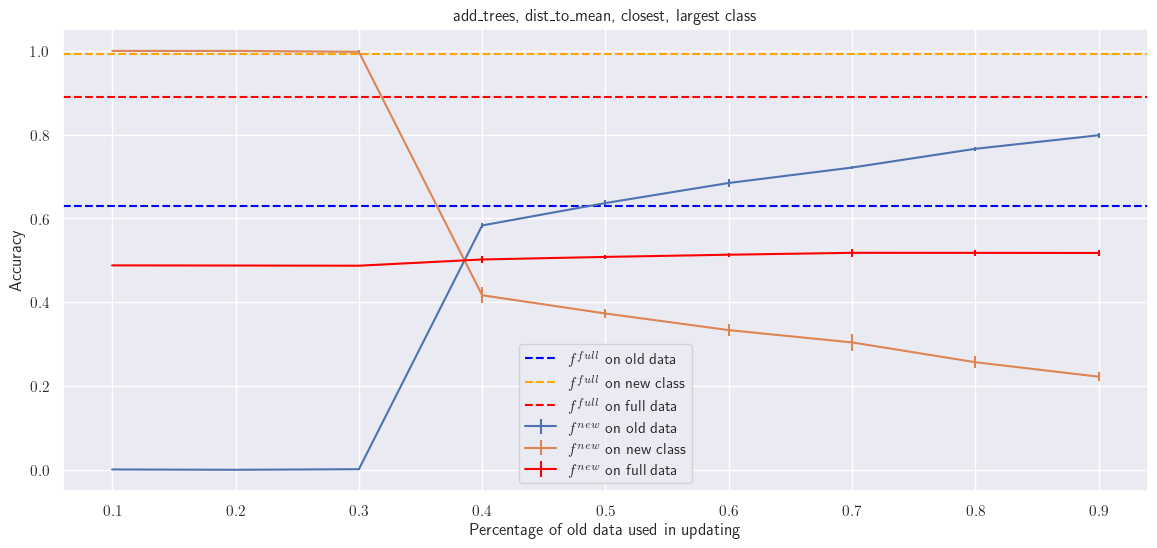

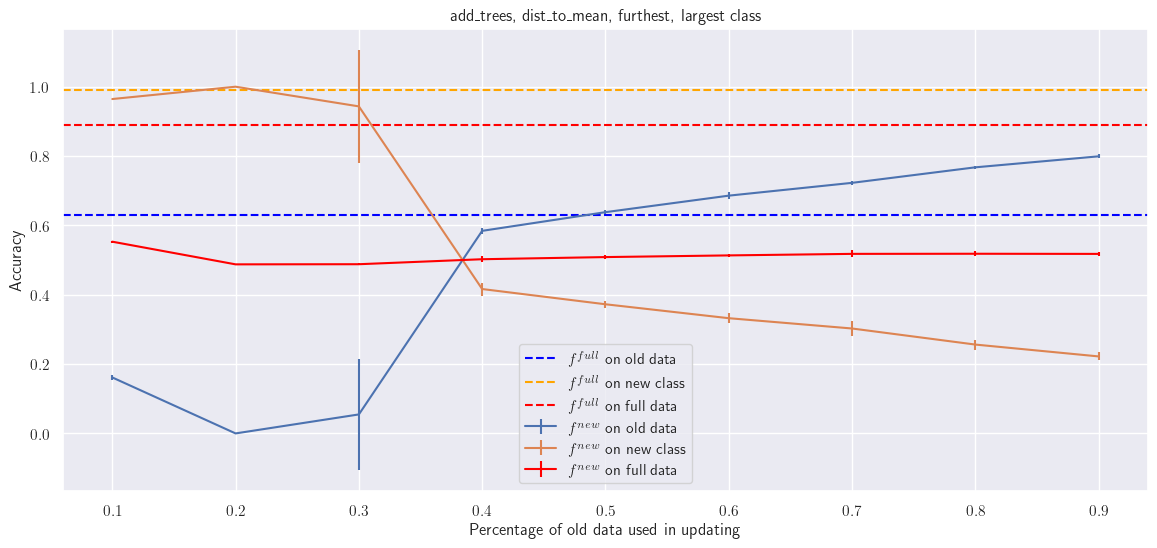

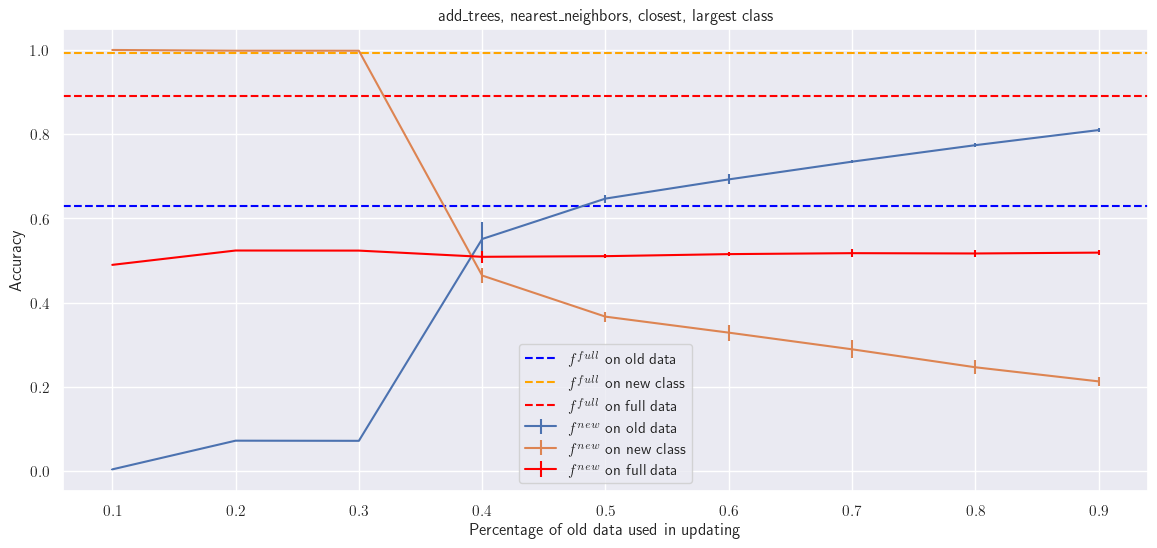

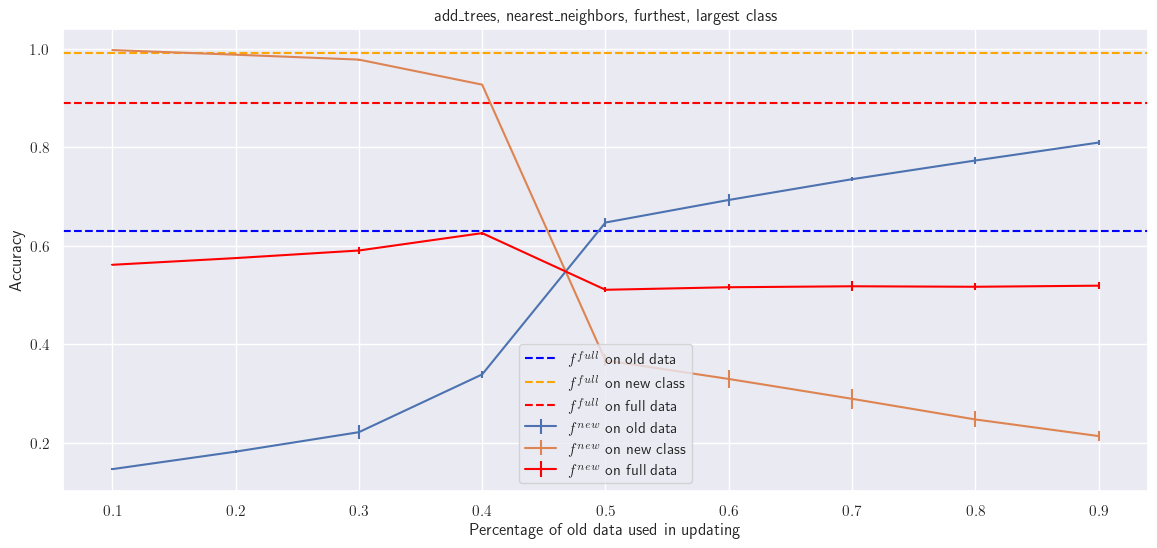

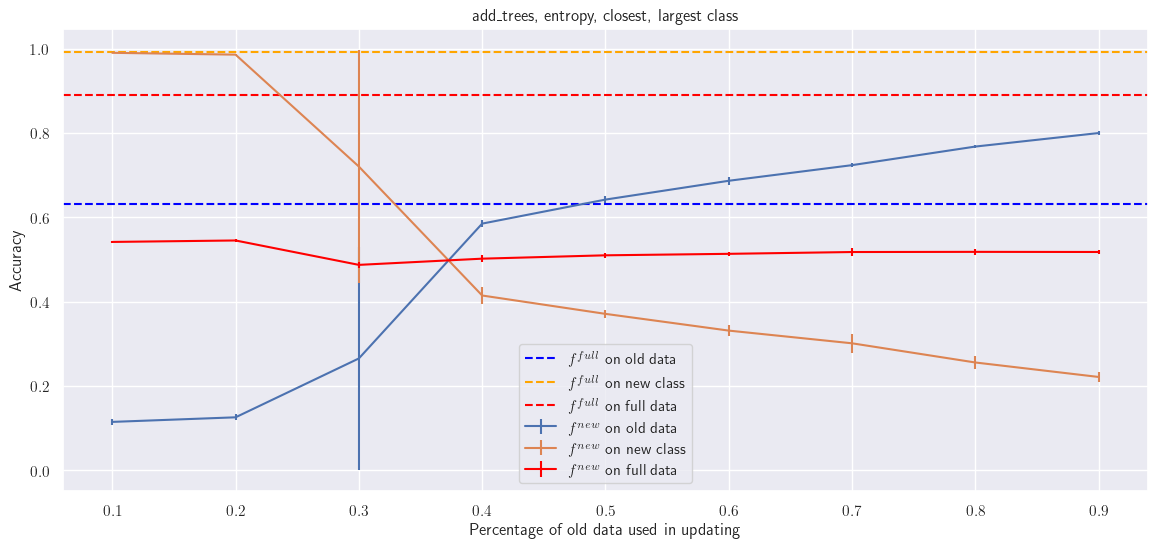

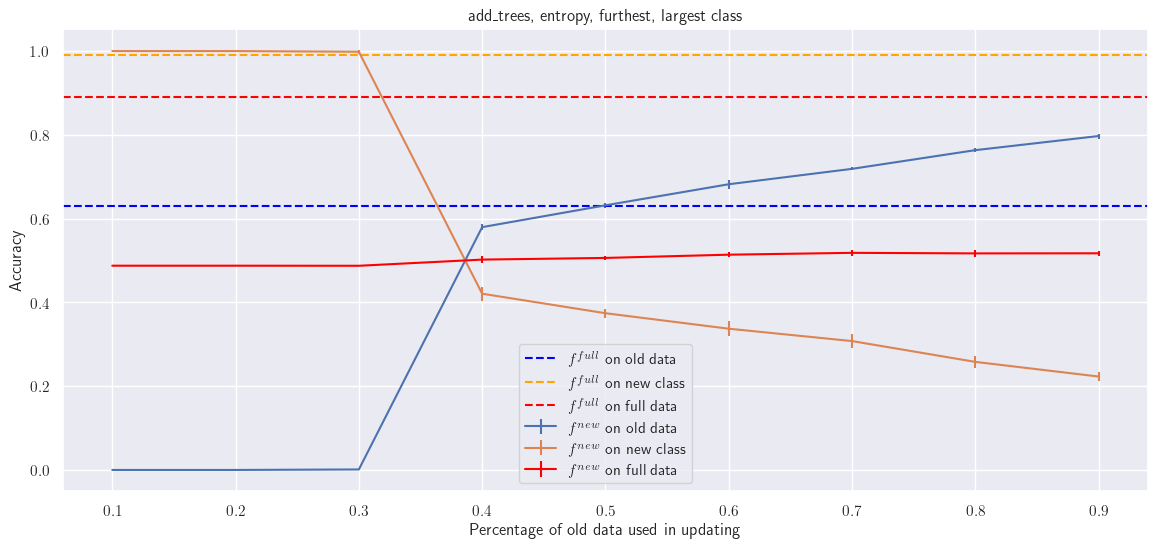

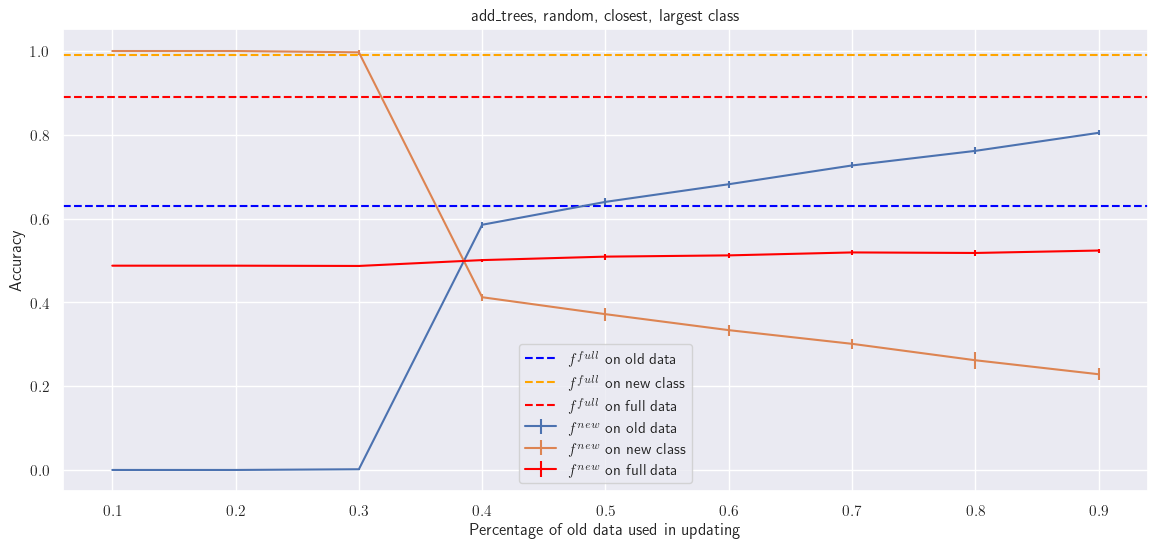

smallest class


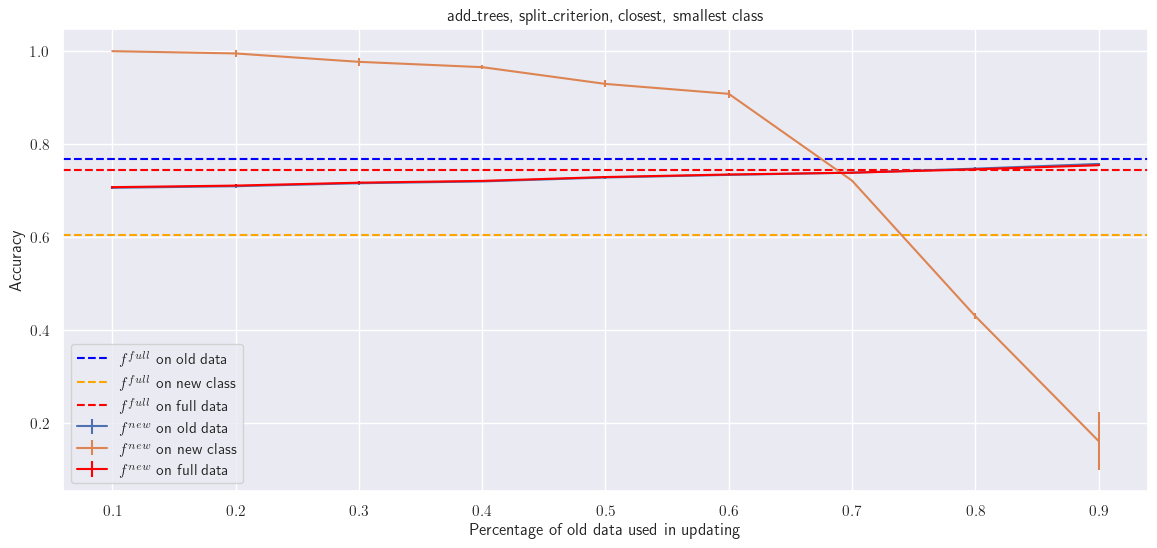

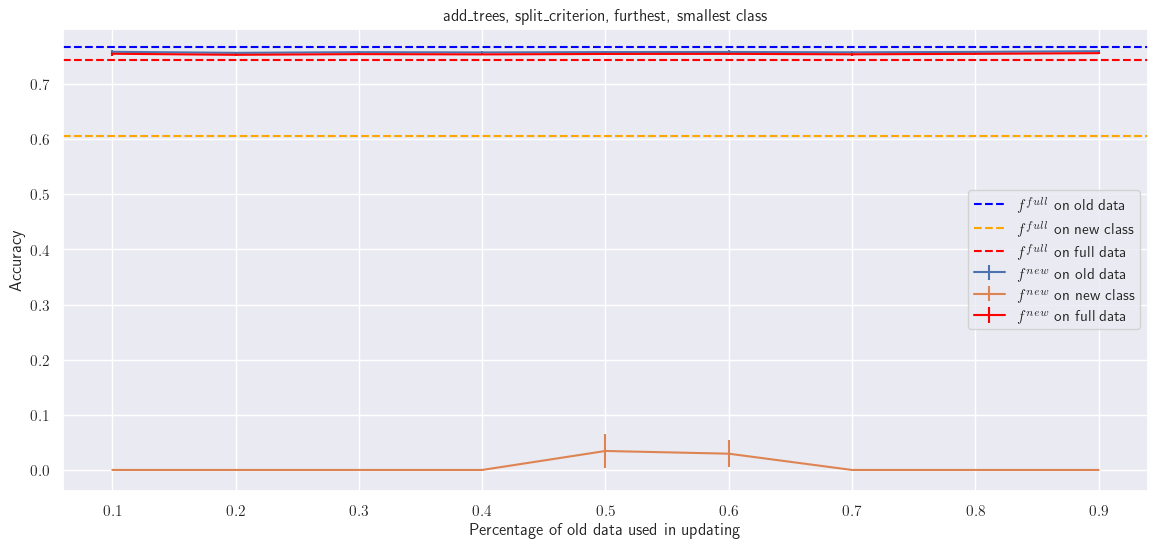

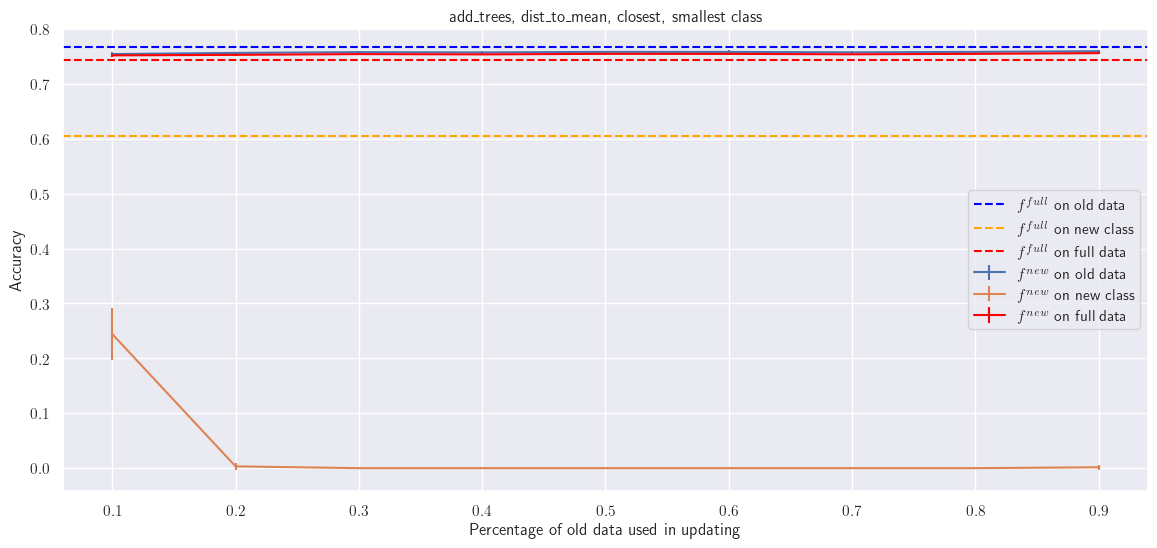

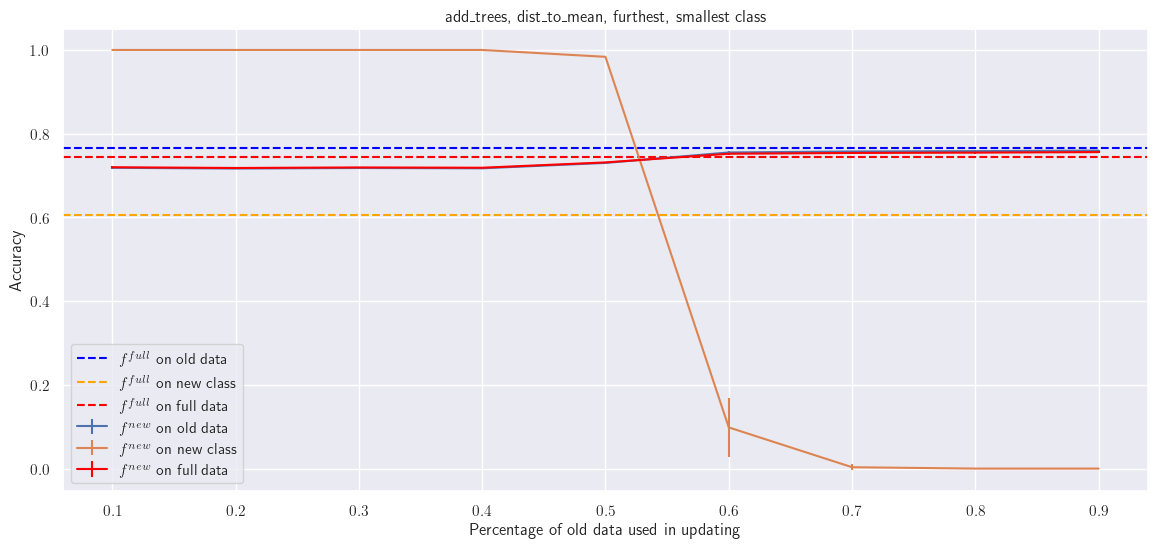

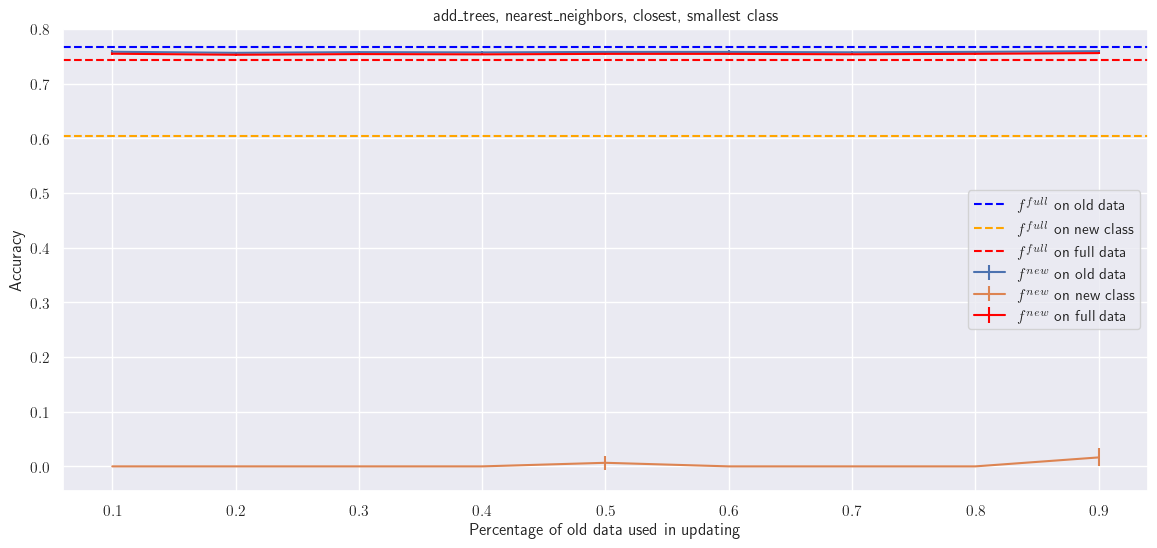

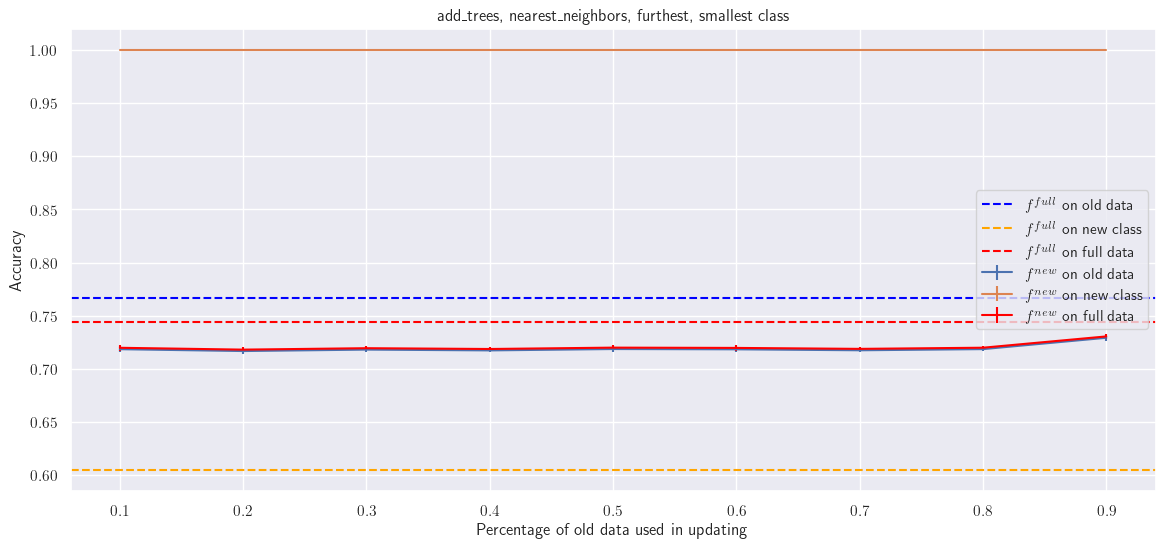

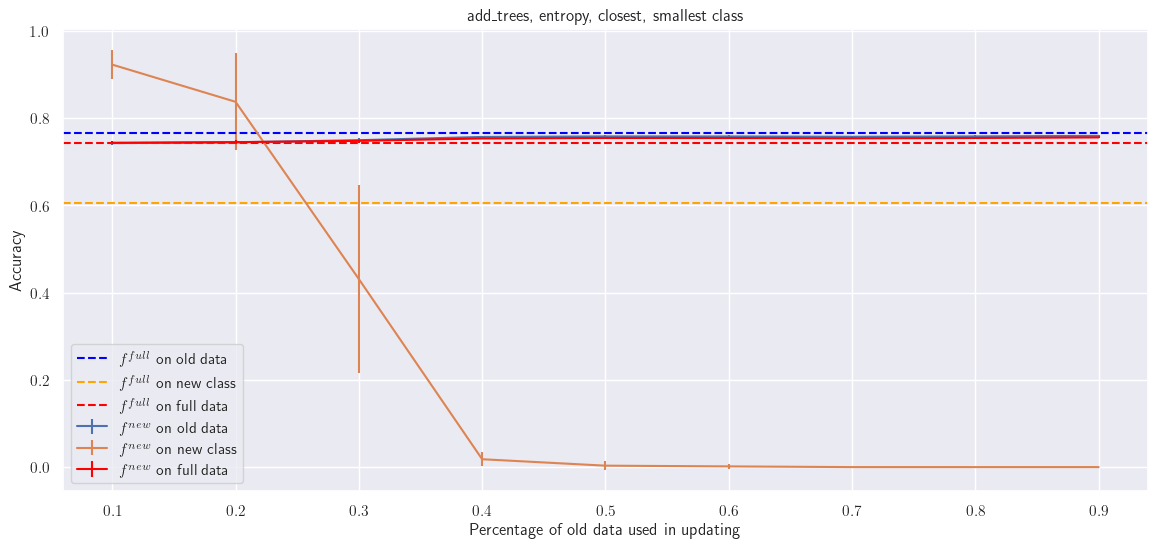

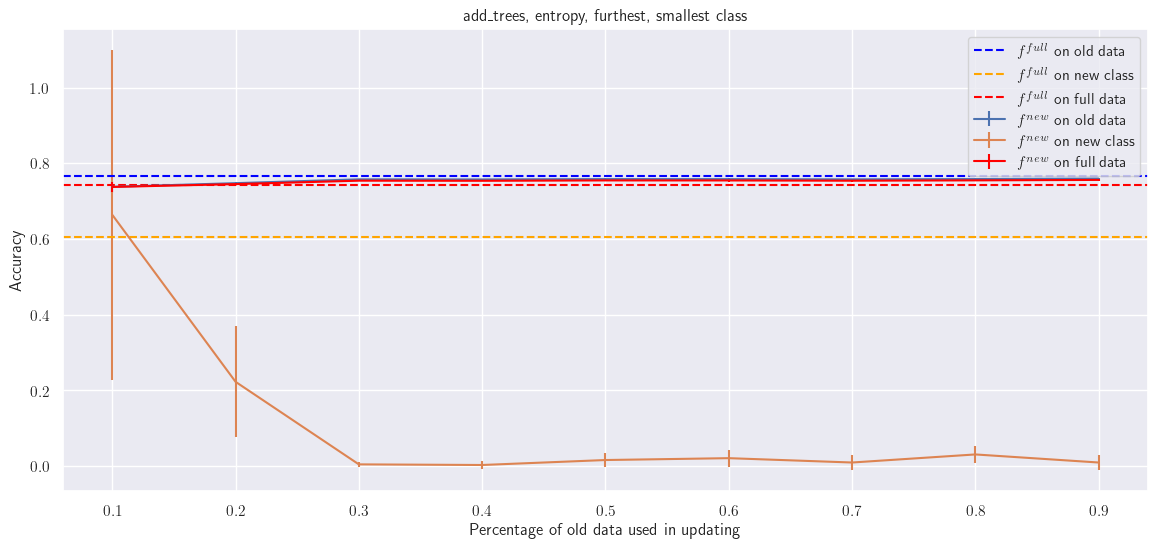

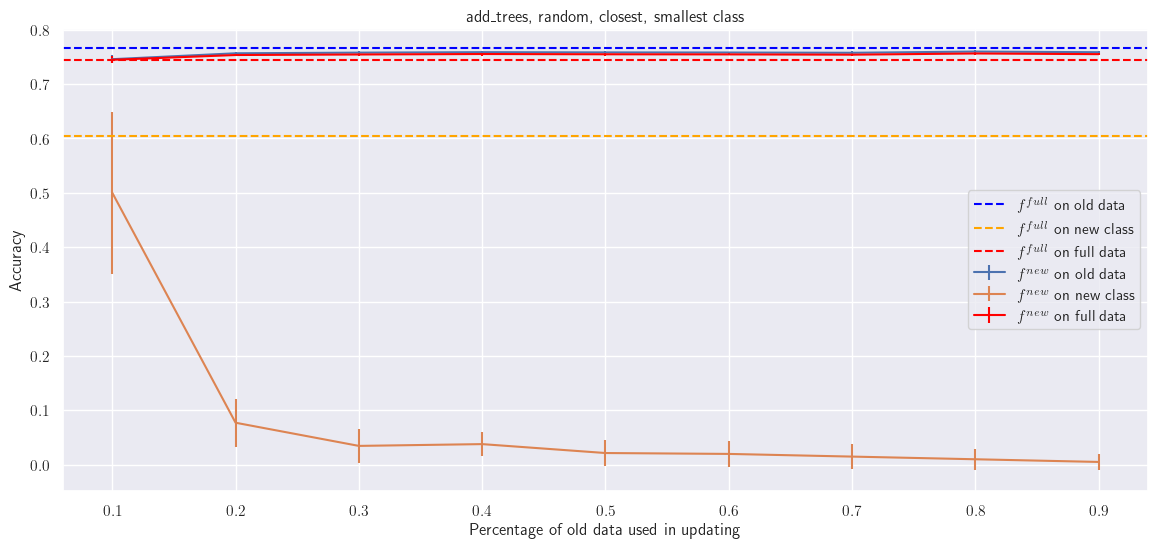

In [15]:
for training_method in ['continued_training', 'add_trees']:
    print(f'Training method: {training_method}')
    for new_class_idx in [largest_class_label, smallest_class_label]:
        if new_class_idx == largest_class_label:
            largest_or_smallest_class = 'largest class'
        elif new_class_idx == smallest_class_label:
            largest_or_smallest_class = 'smallest class'

        print(largest_or_smallest_class)
        
        batch_results = helper_funcs.unpack_batch_results(training_method, largest_or_smallest_class)
        
        for data_selection_method in ['split_criterion', 'dist_to_mean', 'nearest_neighbors', 'entropy']:
            for sort_type in ['closest', 'furthest']:
                experiment_results = helper_funcs.unpack_results(training_method, data_selection_method, sort_type, largest_or_smallest_class)
                helper_funcs.plot_results(training_method, experiment_results, batch_results, data_selection_method, sort_type, largest_or_smallest_class, save=True)
        
        # and once for random method
        experiment_results = helper_funcs.unpack_results(training_method, 'random', 'closest', largest_or_smallest_class)
        helper_funcs.plot_results(training_method, experiment_results, batch_results, 'random', 'closest', largest_or_smallest_class, save=True)

In [13]:
new_class_idx = 6
largest_or_smallest_class = 'largest class'

batch_results = helper_funcs.unpack_batch_results(new_class_idx, largest_or_smallest_class)

for data_selection_method in ['split_criterion', 'dist_to_mean', 'nearest_neighbors', 'entropy']:
    for sort_type in ['closest', 'furthest']:
        experiment_results = helper_funcs.unpack_results(data_selection_method, sort_type, new_class_idx)
        helper_funcs.plot_results(experiment_results, batch_results, data_selection_method, sort_type, new_class_idx, save=True)

# and once for random method
experiment_results = helper_funcs.unpack_results('random', 'closest', new_class_idx)
helper_funcs.plot_results(experiment_results, batch_results, 'random', 'closest', new_class_idx, save=True)

FileNotFoundError: [Errno 2] No such file or directory: 'results/6_largest class_batch_training_results.pkl'

In [9]:
for training_method in ['continued_training', 'add_trees']:
    print(f'Training method: {training_method}')
    for new_class_idx in [largest_class_label, smallest_class_label]:
        if new_class_idx == largest_class_label:
            largest_or_smallest_class = 'largest class'
        elif new_class_idx == smallest_class_label:
            largest_or_smallest_class = 'smallest class'

        print(largest_or_smallest_class)
        
        batch_results = helper_funcs.unpack_batch_results(training_method, largest_or_smallest_class)
        print(batch_results)

Training method: continued_training


NameError: name 'largest_class_label' is not defined